<a href="https://colab.research.google.com/github/MeepoohVP/student_score/blob/main/exam_anlz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import numpy as np 
import matplotlib.pyplot as plt


In [3]:
exam_data = pd.read_csv('/drive/MyDrive/pandas/exams.csv')
exam_data.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
387,male,group C,some high school,free/reduced,completed,54,61,61
590,male,group C,associate's degree,free/reduced,none,81,78,75
6,female,group A,bachelor's degree,standard,none,62,59,63
255,female,group D,some high school,standard,none,53,66,59
839,male,group E,some college,standard,completed,100,84,88
645,male,group C,some college,free/reduced,completed,55,68,60
257,female,group E,some high school,standard,none,69,71,67
53,female,group C,high school,free/reduced,none,36,53,49
309,male,group C,bachelor's degree,standard,completed,79,80,75
303,male,group C,some college,standard,none,73,68,66


บริเวณที่มีสี่เข้ม คือช่วงที่นักเรียนทำคะแนนได้เป็นส่วนใหญ่

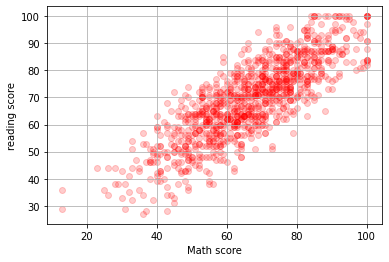

In [ ]:
x = exam_data['math score']
y = exam_data['reading score']
plt.xlabel("Math score")
plt.ylabel("reading score")
plt.scatter(x, y,color = 'red', alpha = 0.2)
plt.grid()
plt.show()


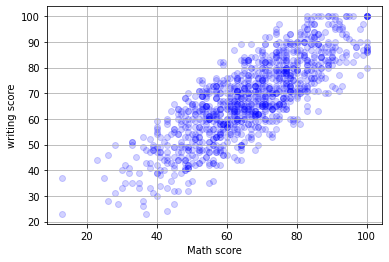

In [ ]:
x = exam_data['math score']
y = exam_data['writing score']

plt.xlabel("Math score")
plt.ylabel("writing score")
plt.scatter(x, y,color = 'blue', alpha = 0.175)
plt.grid()
plt.show()

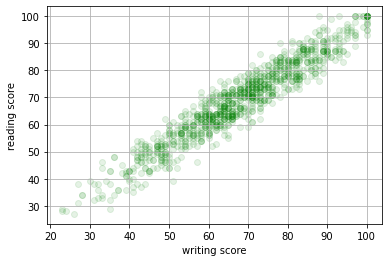

In [ ]:
x = exam_data['writing score']
y = exam_data['reading score']

plt.xlabel("writing score")
plt.ylabel("reading score")
plt.scatter(x, y,color = 'green', alpha = 0.1)
plt.grid()
plt.show()

In [ ]:
stats.mode(exam_data['writing score'])

ModeResult(mode=array([64]), count=array([34]))

# By group

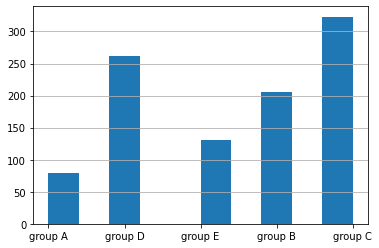

In [ ]:
plt.hist(exam_data['race/ethnicity'])
plt.grid(axis = 'y')
plt.show()

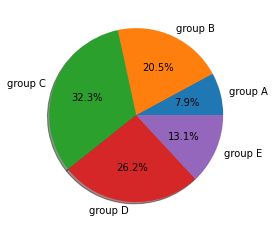

In [54]:
y = [len(exam_data[exam_data['race/ethnicity'] == 'group A']), len(exam_data[exam_data['race/ethnicity'] == 'group B']), len(exam_data[exam_data['race/ethnicity'] == 'group C']), len(exam_data[exam_data['race/ethnicity'] == "group D"]), len(exam_data[exam_data['race/ethnicity'] == "group E"])]
mylabels = ['group A' ,'group B' ,'group C' , "group D", "group E"]
plt.pie(y, labels = mylabels, autopct='%1.1f%%', shadow = True)
plt.show() 

In [ ]:
group_A = exam_data[exam_data['race/ethnicity'] == 'group A']
group_B = exam_data[exam_data['race/ethnicity'] == 'group B']
group_C = exam_data[exam_data['race/ethnicity'] == 'group C']
group_D = exam_data[exam_data['race/ethnicity'] == 'group D']
group_E = exam_data[exam_data['race/ethnicity'] == 'group E']

In [ ]:
print(group_A.describe())

       math score  reading score  writing score
count   79.000000      79.000000      79.000000
mean    65.215190      68.556962      66.974684
std     14.390765      15.946824      16.374601
min     33.000000      33.000000      32.000000
25%     53.500000      59.000000      56.500000
50%     65.000000      70.000000      67.000000
75%     77.000000      78.000000      78.000000
max     94.000000     100.000000     100.000000


In [ ]:
print(group_B.describe())

       math score  reading score  writing score
count  205.000000     205.000000     205.000000
mean    63.170732      67.102439      65.736585
std     14.469207      13.809426      14.866361
min     25.000000      28.000000      23.000000
25%     53.000000      58.000000      57.000000
50%     63.000000      66.000000      66.000000
75%     75.000000      77.000000      76.000000
max     99.000000      98.000000     100.000000


In [ ]:
print(group_C.describe())

       math score  reading score  writing score
count  323.000000     323.000000     323.000000
mean    63.130031      66.383901      64.523220
std     15.071315      14.648087      15.643404
min     13.000000      27.000000      23.000000
25%     53.000000      56.000000      53.000000
50%     64.000000      67.000000      65.000000
75%     74.000000      76.000000      75.000000
max    100.000000     100.000000     100.000000


In [ ]:
print(group_D.describe())

       math score  reading score  writing score
count  262.000000     262.000000     262.000000
mean    69.267176      72.087786      72.259542
std     14.723414      14.305236      14.665406
min     13.000000      36.000000      37.000000
25%     60.250000      63.000000      62.250000
50%     70.000000      71.500000      72.000000
75%     80.750000      84.000000      83.750000
max    100.000000     100.000000     100.000000


In [ ]:
print(group_E.describe())

       math score  reading score  writing score
count  131.000000     131.000000      131.00000
mean    74.465649      72.526718       70.21374
std     15.701689      14.842418       15.65248
min     33.000000      32.000000       32.00000
25%     63.000000      62.000000       59.50000
50%     75.000000      73.000000       71.00000
75%     86.000000      83.500000       82.00000
max    100.000000     100.000000      100.00000


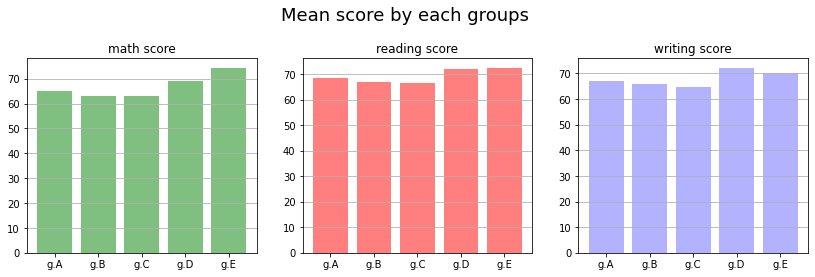

In [ ]:
f = plt.figure(figsize=(14,4))
y = np.array([np.mean(group_A['math score']), np.mean(group_B['math score']), np.mean(group_C['math score']), np.mean(group_D['math score']), np.mean(group_E['math score'])])
x = np.array(['g.A' ,'g.B' ,'g.C' ,'g.D', 'g.E'])
plt.subplot(1, 3, 1)
plt.bar(x, y, color = 'green', alpha = 0.5)
plt.grid(axis = 'y')
plt.title("math score" )

y = np.array([np.mean(group_A['reading score']), np.mean(group_B['reading score']), np.mean(group_C['reading score']), np.mean(group_D['reading score']), np.mean(group_E['reading score'])])
x = np.array(['g.A' ,'g.B' ,'g.C' ,'g.D', 'g.E'])
plt.subplot(1, 3, 2)
plt.bar(x, y, color = 'red', alpha = 0.5)
plt.title("reading score")
plt.grid(axis = 'y')

y = np.array([np.mean(group_A['writing score']), np.mean(group_B['writing score']), np.mean(group_C['writing score']), np.mean(group_D['writing score']), np.mean(group_E['writing score'])])
x = np.array(['g.A' ,'g.B' ,'g.C' ,'g.D', 'g.E'])
plt.subplot(1, 3, 3)
plt.bar(x, y, color = 'blue', alpha = 0.3)
plt.title("writing score")
plt.grid(axis = 'y')
plt.suptitle("Mean score by each groups").set_fontsize(18)
plt.subplots_adjust(top=0.8)
plt.show()

นักเรียนกลุ่ม E มีคะแนนเฉลี่ยคณิตศาสตร์ และการอ่านสูงสุด ในขณะที่กลุ่ม D มีคะแนนเฉลี่ยการเขียนสูงสุด

#วิเคราะห์จากการระดับการศึกษาของผู้ปกครอง

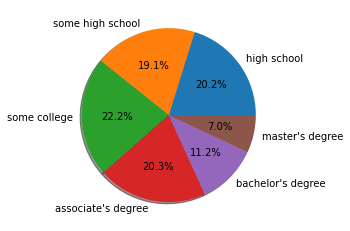

In [52]:
y = [len(exam_data[exam_data['parental level of education'] == 'high school']), len(exam_data[exam_data['parental level of education'] == 'some high school']), len(exam_data[exam_data['parental level of education'] == 'some college']), len(exam_data[exam_data['parental level of education'] == "associate's degree"]), len(exam_data[exam_data['parental level of education'] == "bachelor's degree"]),len(exam_data[exam_data['parental level of education'] == "master's degree"])]
mylabels = ['high school' ,'some high school' ,'some college' , "associate's degree", "bachelor's degree", "master's degree"]

plt.pie(y, labels = mylabels, autopct='%1.1f%%', shadow = True)
plt.show() 

In [ ]:
set(exam_data['parental level of education'].tolist())

{"associate's degree",
 "bachelor's degree",
 'high school',
 "master's degree",
 'some college',
 'some high school'}

In [ ]:
h_school = exam_data[exam_data['parental level of education'] == 'high school']
sh_school = exam_data[exam_data['parental level of education'] == 'some high school']
s_college = exam_data[exam_data['parental level of education'] == 'some college']
bachelor = exam_data[exam_data['parental level of education'] == "bachelor's degree"]
associate = exam_data[exam_data['parental level of education'] == "associate's degree"]
master = exam_data[exam_data['parental level of education'] == "master's degree"]

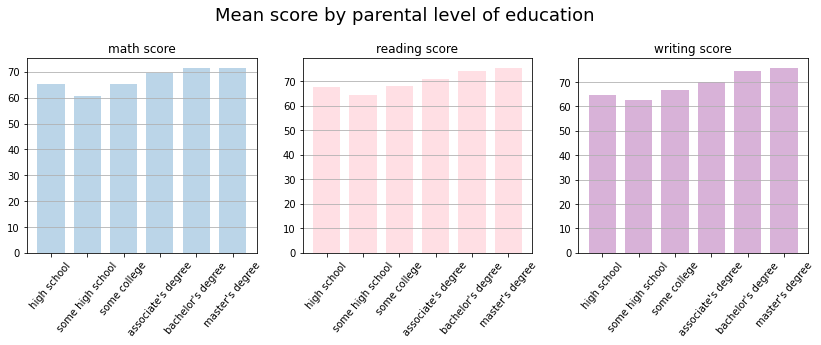

71.49107142857143 71.58571428571429


In [ ]:
f = plt.figure(figsize=(14,4))
y = np.array([np.mean(h_school['math score']), np.mean(sh_school['math score']), np.mean(s_college['math score']),  np.mean(associate['math score']), np.mean(bachelor['math score']), np.mean(master['math score'])])
x = np.array(['high school' ,'some high school' ,'some college' , "associate's degree", "bachelor's degree", "master's degree"])
plt.subplot(1, 3, 1)
plt.bar(x, y, alpha = 0.3, width = 0.75)
plt.title("math score")
plt.xticks(rotation = 50)
plt.grid(axis = 'y')

y = np.array([np.mean(h_school['reading score']), np.mean(sh_school['reading score']), np.mean(s_college['reading score']), np.mean(associate['reading score']), np.mean(bachelor['reading score']), np.mean(master['reading score'])])
x = np.array(['high school' ,'some high school' ,'some college' , "associate's degree", "bachelor's degree", "master's degree"])
plt.subplot(1, 3, 2)
plt.bar(x, y, color = 'pink', alpha = 0.5, width = 0.75)
plt.title("reading score")
plt.xticks(rotation = 50)
plt.grid(axis = 'y')

y = np.array([np.mean(h_school['writing score']), np.mean(sh_school['writing score']), np.mean(s_college['writing score']), np.mean(associate['writing score']),  np.mean(bachelor['writing score']), np.mean(master['writing score'])])
x = np.array(['high school' ,'some high school' ,'some college' ,"associate's degree", "bachelor's degree", "master's degree"])
plt.subplot(1, 3, 3)
plt.bar(x, y, color = 'purple', alpha = 0.3, width = 0.75)
plt.title("writing score")
plt.xticks(rotation = 50)
plt.grid(axis = 'y')
plt.suptitle("Mean score by parental level of education").set_fontsize(18)
plt.subplots_adjust(top=0.8)
plt.show()
print(np.mean(bachelor['math score']), np.mean(master['math score']))

นักเรียนที่มีผู้ปกครองจบการศึกษาระดับ master's degree มีคะแนนเฉลี่ยมากที่สุด

#By lunch

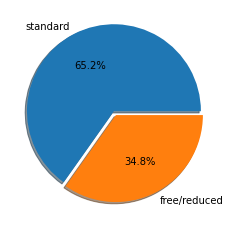

In [56]:
y = [len(exam_data[exam_data['lunch'] == 'standard']), len(exam_data[exam_data['lunch'] == 'free/reduced'])]
mylabels = ['standard' ,'free/reduced']
myexplode = [0.05, 0]
plt.pie(y, labels = mylabels, autopct='%1.1f%%', shadow = True, explode = myexplode)
plt.show() 

In [ ]:
standard_lunch = exam_data[exam_data['lunch'] == 'standard']
free_lunch = exam_data[exam_data['lunch'] == 'free/reduced']

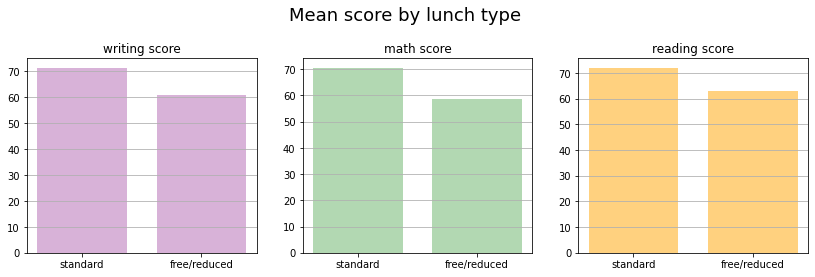

In [ ]:
f = plt.figure(figsize=(14,4))
#Writing score
y = np.array([np.mean(standard_lunch['writing score']), np.mean(free_lunch['writing score'])])
x = np.array(['standard' ,'free/reduced'])
plt.subplot(1, 3, 1)
plt.bar(x, y, color = 'purple', alpha = 0.3, width = 0.75)
plt.title("writing score")
plt.grid(axis = 'y')

#Math score
y = np.array([np.mean(standard_lunch['math score']), np.mean(free_lunch['math score'])])
x = np.array(['standard' ,'free/reduced'])
plt.subplot(1, 3, 2)
plt.bar(x, y, color = 'green', alpha = 0.3, width = 0.75)
plt.title("math score")
plt.grid(axis = 'y')

#Reading score
y = np.array([np.mean(standard_lunch['reading score']), np.mean(free_lunch['reading score'])])
x = np.array(['standard' ,'free/reduced'])
plt.subplot(1, 3, 3)
plt.bar(x, y, color = 'orange', alpha = 0.5, width = 0.75)
plt.title("reading score")
plt.grid(axis = 'y')
plt.suptitle("Mean score by lunch type").set_fontsize(18)
plt.subplots_adjust(top=0.8)
plt.show()

นักเรียนที่ทานอาหารกลางวันแบบ Standard มีคะแนนเฉลี่ยรวมทุกวิชาสูงกว่า free/reduced

# By test preparation course

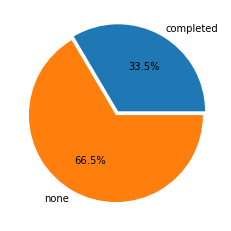

In [17]:
y = [len(exam_data[exam_data['test preparation course'] == 'completed']), len(exam_data[exam_data['test preparation course'] == 'none'])]
mylabels = ["completed", "none"]
myexplode = [0.05, 0]
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.1f%%')
plt.show() 

In [ ]:
completed = exam_data[exam_data['test preparation course'] == 'completed']
none = exam_data[exam_data['test preparation course'] == 'none']

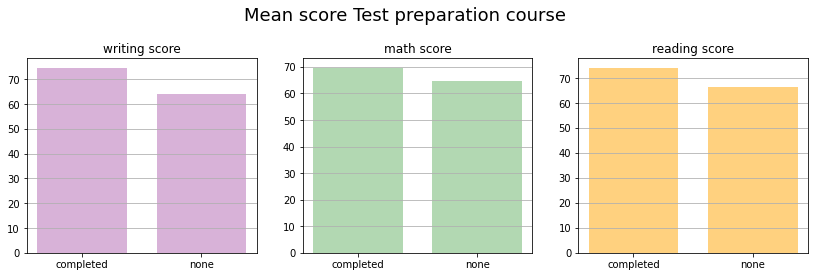

In [ ]:
f = plt.figure(figsize=(14,4))
#Writing score
y = np.array([np.mean(completed['writing score']), np.mean(none['writing score'])])
x = np.array(['completed' ,'none'])
plt.subplot(1, 3, 1)
plt.bar(x, y, color = 'purple', alpha = 0.3, width = 0.75)
plt.title("writing score")
plt.grid(axis = 'y')

#Math score
y = np.array([np.mean(completed['math score']), np.mean(none['math score'])])
x = np.array(['completed' ,'none'])
plt.subplot(1, 3, 2)
plt.bar(x, y, color = 'green', alpha = 0.3, width = 0.75)
plt.title("math score")
plt.grid(axis = 'y')

#Reading score
y = np.array([np.mean(completed['reading score']), np.mean(none['reading score'])])
x = np.array(['completed' ,'none'])
plt.subplot(1, 3, 3)
plt.bar(x, y, color = 'orange', alpha = 0.5, width = 0.75)
plt.title("reading score")
plt.grid(axis = 'y')
plt.suptitle("Mean score Test preparation course").set_fontsize(18)
plt.subplots_adjust(top=0.8)
plt.show()

นักเรียนที่เข้าร่วม Test preparation course มีคะแนนเฉลี่ยสูงกว่านักเรียนที่ไม่เข้าร่วม

# By gender

In [5]:
len(exam_data[exam_data['gender'] == 'male'])

517

In [6]:
len(exam_data[exam_data['gender'] == 'female'])

483

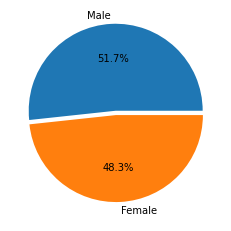

In [16]:
y = [len(exam_data[exam_data['gender'] == 'male']), len(exam_data[exam_data['gender'] == 'female'])]
mylabels = ["Male", "Female"]
myexplode = [0.05, 0]
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.1f%%')
plt.show() 

In [ ]:
male = exam_data[exam_data['gender'] == 'male']
female = exam_data[exam_data['gender'] == 'female']

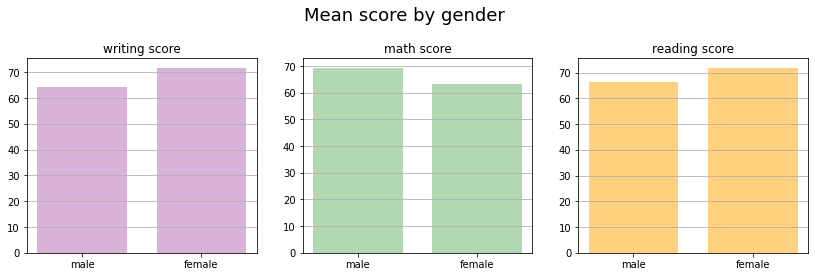

In [ ]:
f = plt.figure(figsize=(14,4))
#Writing score
y = np.array([np.mean(male['writing score']), np.mean(female['writing score'])])
x = np.array(['male' ,'female'])
plt.subplot(1, 3, 1)
plt.bar(x, y, color = 'purple', alpha = 0.3, width = 0.75)
plt.title("writing score")
plt.grid(axis = 'y')

#Math score
y = np.array([np.mean(male['math score']), np.mean(female['math score'])])
x = np.array(['male' ,'female'])
plt.subplot(1, 3, 2)
plt.bar(x, y, color = 'green', alpha = 0.3, width = 0.75)
plt.title("math score")
plt.grid(axis = 'y')

#Reading score
y = np.array([np.mean(male['reading score']), np.mean(female['reading score'])])
x = np.array(['male' ,'female'])
plt.subplot(1, 3, 3)
plt.bar(x, y, color = 'orange', alpha = 0.5, width = 0.75)
plt.title("reading score")
plt.grid(axis = 'y')
plt.suptitle("Mean score by gender").set_fontsize(18)
plt.subplots_adjust(top=0.8)
plt.show()

นักเรียนหญิงมีคะแนนเฉลี่ยการเขียนและการอ่านสูงกว่านักเรียนชาย และนักเรียนชายมีคะแนนคณิตศาสตร์สูงกว่านักเรียนหญิง

# ทายคะแนนการเขียน จากคะแนนอีก 2 วิชา

In [ ]:
X = exam_data[['math score', 'reading score']]
y = exam_data['writing score']
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(train_X, train_y)

LinearRegression()

In [ ]:
predictions = regr.predict(val_X)

ค่าความคาดเคลื่อนของการทำนาย

In [ ]:
mean_absolute_error(val_y, predictions)

3.7903971077157803

In [ ]:
#regr.predict([[math_score,reading_score]])

In [ ]:
#print('Your writing score:', regr.predict([[90,83]])[0])